# 2.2 Pandas, Basic Mapping

This section aims to provide new skills in python to handle structured "table" data. 

Learning outcome:
-   Manipulation of data frames (describing, filtering, ...) 
-   Learn about Lambda functions
-   Intro to datetime objects
-   Plotting data from data frames (histograms and maps)
-   Introduction to Plotly, an interactive plotting package
-   Introduction to CSV & Parquet


We will work on several structured data sets: sensor metadata, seismic data product (earthquake catalog).

First, we import all the modules we need:

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import time
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 
# pio.renderers.default = 'iframe' # writes files as standalone html, 
# pio.renderers.default = 'png' # writes files as standalone html, 
# try notebook, jupyterlab, png, vscode, iframe


# The Basics of Pandas 

Pandas are composed of ``Series`` and ``DataFrame``. ``Series`` are columns with attributes or keys. The ``DataFrame`` is a multi-dimensional table made up of ``Series``.

We can create a DataFrame composed of series from scratch using Python dictionary:

In [3]:
data = {
    'temperature' : [36,37,30,50],
    'precipitation':[3,1,0,0]
}
my_pd = pd.DataFrame(data)
print(my_pd)

   temperature  precipitation
0           36              3
1           37              1
2           30              0
3           50              0


Each (key,value) item in the dataframe correspond to a value in ``data``. To get the keys of the dataframe, type:

In [4]:
my_pd.keys()

Index(['temperature', 'precipitation'], dtype='object')

get a specific ``Series`` (different from the array)

In [5]:
print(my_pd.temperature[:])
print(type(my_pd.temperature[:]))

0    36
1    37
2    30
3    50
Name: temperature, dtype: int64
<class 'pandas.core.series.Series'>


to get the _value_ of a specific key (e.g., temperature), at a specific index (e.g., 2) type:

In [6]:
print(my_pd.temperature[2])
print(type(my_pd.temperature[2]))

30
<class 'numpy.int64'>


# Reading a DataFrame from a CSV file

We can read a pandas directly from a standard file. Here you will read a catatalog of earthquakes.

In [7]:
quake = pd.read_csv("Global_Quakes_IRIS.csv")

Now you use the ``head`` function to display what is in the file

In [8]:
# enter answer here
quake.head()

,time,latitude,longitude,depth,magnitude,description
0,2010-07-02 06:04:03.570,-13.6098,166.6541,34400.0,6.3,VANUATU ISLANDS
1,2010-07-04 21:55:52.370,39.6611,142.5792,30100.0,6.3,NEAR EAST COAST OF HONSHU
2,2010-07-10 11:43:33.000,11.1664,146.0823,16900.0,6.3,SOUTH OF MARIANA ISLANDS
3,2010-07-12 00:11:20.060,-22.2789,-68.3159,109400.0,6.2,NORTHERN CHILE
4,2010-07-14 08:32:21.850,-38.0635,-73.4649,25700.0,6.6,NEAR COAST OF CENTRAL CHILE


Display the depth using two ways to use the pandas object

In [9]:
print(quake.depth)
print(quake['depth'])

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64
0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64


Calculate basic statitics of the data using the function ``describe``.

In [ ]:
quake.describe()

Calculate mean and median of specific ``Series``, for example depth.

In [ ]:
# answer it here
print(quake.depth.mean())
print(quake.depth.median())


## Simple Python Functions
We will now practice how to modify the content of the DataFrame using functions. We will take the example that we want to change the depth values from meters to kilometers. First we can define this operation as a function

In [ ]:
# this function converts a value in meters to a value in kilometers
m2km = 1000 # this is defined as a global variable
def meters2kilometers(x):
    return x/m2km


In [ ]:
# now test it using the first element of the quake DataFrame
meters2kilometers(quake.depth[0])

Let's define another function that uses a local instead of global variable

In [ ]:
def meters2kilometers2(x):
    m2km2=1000
    return x/m2km2
# m2km2 is a local variable and cannot be called outside of the function. Prove it next by inquiring its value in the next cell.

In [ ]:
print(m2km2)

We now discuss the **lambda** functions.

In [ ]:
# now we apply it on the entire Series
meters2kilometers(quake.depth)

We can also define this very basic function as a **lambda** function. There are several ways of doing an operation on all rows of a column. The first option is to use the map function.

If you are not familiar with lambda function in Python, look at:

https://realpython.com/python-lambda/

We will practice a bit lambda functions



In [11]:
# Now the equivalent in lambda is:
lambda_meters2kilometers = lambda x:x/1000
# x is the variable

In [12]:
# apply it to the entire series
lambda_meters2kilometers(quake.depth)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

In [13]:
# you can add several variables into lambda functions
remove_anything = lambda x,y:x-y
remove_anything(3,2)

1

We will now use a lambda function to scale the depth values to km. 

In [14]:
quake.depth.map(lambda p: p/1000)

0        34.40
1        30.10
2        16.90
3       109.40
4        25.70
         ...  
1780     10.00
1781    105.00
1782    608.51
1783     10.00
1784     35.44
Name: depth, Length: 1785, dtype: float64

This did not affect the values of the DataFrame, check it:

In [15]:
quake.depth

0        34400.0
1        30100.0
2        16900.0
3       109400.0
4        25700.0
          ...   
1780     10000.0
1781    105000.0
1782    608510.0
1783     10000.0
1784     35440.0
Name: depth, Length: 1785, dtype: float64

Instead, you could overwrite ``quake.depth=X``. Try two approaches but just do it once!

In [16]:
#type answer below
quake.depth=quake.depth.map(lambda x:x/1000)

In [17]:
# or like this
# quake.depth=quake.depth.apply(lambda x:x/1000)

Plot a histogram of the depth distributions using matplotlib function ``hist``.

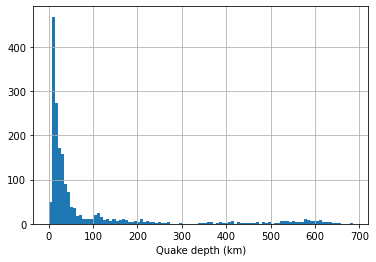

In [18]:
# answer here
plt.hist(quake.depth,100)
plt.grid(True)
plt.xlabel('Quake depth (km)')
plt.show()

You can use the interactive plotting package Plotly. First we will show a histogram of the event depth using the function ``histogram``

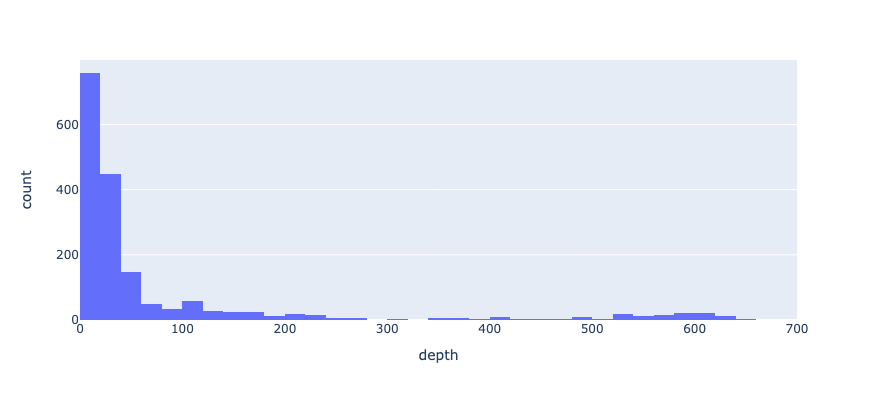

In [19]:
fig = px.histogram(quake,   #specify what dataframe to use
             x="depth",  #specify the variable for the histogram 
             nbins=50,       #number of bins for the histogram 
             height=400,     #dimensions of the figure
             width=600);
fig.show()

We will now make a new plot of the location of the earthquakes. We will use Plotly tool. 

The markersize will be scaled with the earthquake magnitude. To do so, we add a ``marker_size`` series in the DataFrame

In [20]:
quake['marker_size'] =np.fix(np.exp(quake['magnitude'])) # add marker size as exp(mag)
quake['magnitude bin'] = 0.5*np.fix(2*quake['magnitude']) # add marker size as exp(mag)

## Mapping using Plotly

Now we will plot the earthquakes locations on a map using the Plotly package. More tutorials on [Plotly](https://plotly.com/). Input of the function in the function is self-explanatory and typical of Python's function. The code [documentation](https://plotly.com/python/scatter-plots-on-maps/) of Plotly scatter_geo lists the variables.

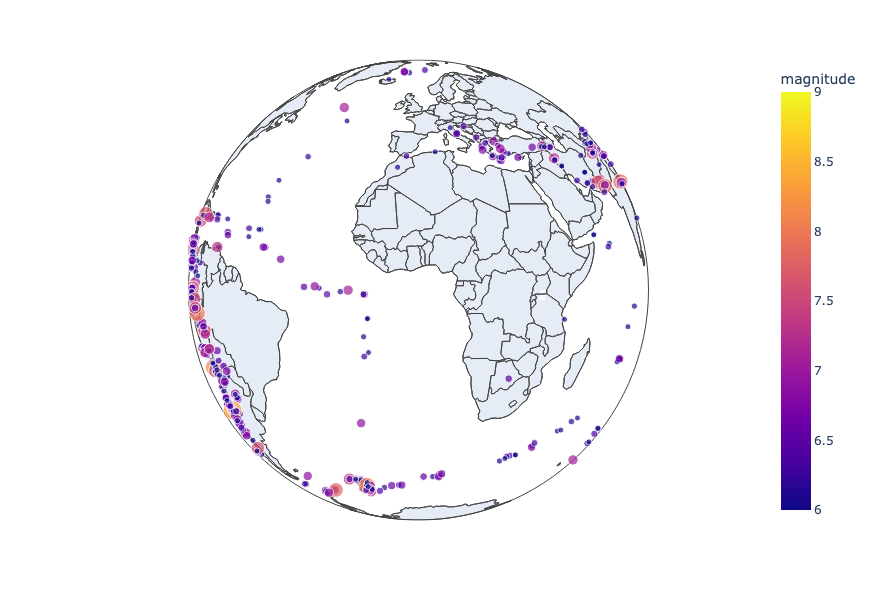

In [21]:
fig = px.scatter_geo(quake,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


The data was sorted by time. We now want to sort and show the data instead by magnitude. We use the pandas function ``sort`` to create a new DataFrame with sorted values.

In [ ]:
quakes2plot=quake.sort_values(by='magnitude bin')

quakes2plot.head()

Now we will plot again using Plotly

In [ ]:
fig = px.scatter_geo(quakes2plot,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     size='marker_size', color='magnitude',
                     hover_name="description",
                     hover_data=['description','magnitude','depth']);
fig.update_geos(resolution=110, showcountries=True)
# fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")


## Creating a new DataFrame from a text file

The python package pandas is also very useful to parse many text files that are more or less formated as one observation per row and one column for each feature.

As an example, we are going to look at the list of seismic stations from the Northern California seismic network, available [here](http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day):



In [ ]:
url = 'http://ncedc.org/ftp/pub/doc/NC.info/NC.channel.summary.day'

However, many options are available if the file is not well formatted. See more in this [tutorial](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):



In [ ]:
# this gets the file linked in the URL page and convert it to a string
s = requests.get(url).content 

In [ ]:

# this will convert the string, decode it , and make it a table
data = pd.read_csv(io.StringIO(s.decode('utf-8')), header=None, skiprows=2, sep='\s+', usecols=list(range(0, 13)))
# because columns/keys were not assigned, assign them now
data.columns = ['station', 'network', 'channel', 'location', 'rate', 'start_time', 'end_time', 'latitude', 'longitude', 'elevation', 'depth', 'dip', 'azimuth']

Let us look at the data. They are now stored into a pandas dataframe. Read the top of the table:

In [ ]:
data.head()

We can output the first element of the DataFrame:

In [ ]:
data.iloc[0]

In [ ]:
data.iloc[:, 0]

The DataFrame may have bad values. A typical data cleaning involves removing Nan and Zeros for instance.

In [ ]:
data.dropna(inplace=True)
data=data[data.longitude!=0]

Use Plotly to map the stations.

In [ ]:
fig = px.scatter_geo(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),
                     height=600, width=600,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_geos(resolution=110, showcountries=True)


In [ ]:
fig = px.scatter_mapbox(data,
                     lat='latitude',lon='longitude', 
                     range_color=(6,9),mapbox_style="carto-positron",
                     height=600, width=500,
                     hover_name="station",
                     hover_data=['network','station','channel','rate']);
fig.update_layout(title="Northern California Seismic Network")
fig.show()

## Pandas: data selection
We can filter the data with the value taken by a given column:

In [ ]:
data.loc[data.station=='KCPB']

In [ ]:
# Select two stations, use the typical "OR" |
data.loc[(data.station=='KCPB') | (data.station=='KHBB')]

In [ ]:
# Select two stations, use the typical "AND" &
data.loc[(data.station=='KCPB') & (data.channel=='HNZ')]

In [ ]:
# or like this
data.loc[data.station.isin(['KCPB', 'KHBB'])]

We can access to a brief summary of the data:

In [ ]:
data.station.describe()

In [ ]:
data.elevation.describe()

We can perform standard operations on the whole data set:

In [ ]:
data.mean()

In the case of a categorical variable, we can get the list of possile values that this variable can take:

In [ ]:
data.channel.unique()

and get the number of times that each value is taken:

In [ ]:
data.station.value_counts()

The second option is to use the apply function:

In [ ]:
data_elevation_mean=data.elevation.unique().mean()
def remean_elevation(row):
    row.elevation = row.elevation - data_elevation_mean
    return row
data.apply(remean_elevation, axis='columns')

We can also carry out simple operations on columns, provided they make sense.

In [ ]:
netsta=(data.network + '.' + data.station)
print(netsta)
print(type(netsta))

In [ ]:
netsta=(data.network + '.' + data.station).values
print(netsta)
print(type(netsta))

A useful feature is to group the rows depending on the value of a categorical variable, and then apply the same operation to all the groups. For instance, we want to know how many times each station appears in the file:

In [ ]:
data.groupby('station').station.count()

We can have access to the data type of each column:

In [ ]:
data.dtypes

Here, pandas does not recognize the start_time and end_time columns as a datetime format, so we cannot use datetime operations on them. We first need to convert these columns into a datetime format:

In [ ]:
data.start_time.values()

In [ ]:
type(data['start_time'][0])

In [ ]:
# Transform column from string into datetime format
startdate = pd.to_datetime(data['start_time'], format='%Y/%m/%d,%H:%M:%S')
data['start_time'] = startdate
print(data['start_time'] )
type(data['start_time'][0])

In [ ]:
print(data['end_time'])

In [ ]:
# do the same for end times
# Avoid 'OutOfBoundsDatetime' error with year 3000
enddate = data['end_time'].str.replace('3000', '2025')
enddate = pd.to_datetime(enddate, format='%Y/%m/%d,%H:%M:%S')
data['end_time'] = enddate

We can now look when each seismic station was installed:

In [ ]:
data.groupby('station').apply(lambda df: df.start_time.min())

The ``agg`` function allows to carry out several operations to each group of rows:

Select the stations that were deployed first and recovered last

In [ ]:
data.groupby(['station']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

We can also make groups by selecting the values of two categorical variables:

In [ ]:
data.groupby(['station', 'channel']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

Previously, we just printed the output, but we can also store it in a new variable:

In [ ]:
data_grouped = data.groupby(['station', 'channel']).agg({'start_time':lambda x: min(x), 'end_time':lambda x: max(x)})

Print the new dataframe and look at the rows indexes. Anything wrong?

In [ ]:
# enter code here

When we select only some rows, the index is not automatically reset to start at 0. We can do it manually. Many functions in pandas have also an option to reset the index, and option to transform the dataframe in place, instead of saving the results in another variable.

In [ ]:
data_grouped.reset_index()

It is also possible to sort the dataset by value.

In [ ]:
data_grouped.sort_values(by='start_time')

We can apply the sorting to several columns:

In [ ]:
data_grouped.sort_values(by=['start_time', 'end_time'])

## CSV vs Parquet

Parquet is a compressed data format that stores and compress the culumns. It is fast for I/O and compact formt.

Save ``data`` into a CSV file:

In [ ]:
%timeit data.to_csv("my_metadata.csv")
!ls -lh my_metadata.csv

Try and save in Parquet, compare time and memory

In [ ]:
%timeit data.to_parquet("my_metadata.pq")
!ls -lh my_metadata.pq